<a href="https://colab.research.google.com/github/gokulbot/StartingWithPython-ai1-fall2019/blob/master/mnist_keras_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# taken from lukas/ml-class
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.callbacks import Callback
import json

!pip install wandb
from wandb.keras import WandbCallback
import wandb
run = wandb.init()
config = run.config






config.optimizer = "adam"
config.epochs = 3
config.hidden_nodes = 30



# Normalize, change learning rate, play with layer size, batchsize
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1]
img_height = X_train.shape[2]
print(X_train.shape, y_train.shape)
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]


# create model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=config.optimizer,
              metrics=['accuracy'])
model.summary()


(60000, 28, 28) (60000,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 11s 176us/step - loss: 0.3584 - acc: 0.8937 - val_loss: 0.1922 - val_acc: 0.9422
Epoch 2/3
60000/60000 [============

In [7]:
# Fit the model
%%wandb
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs,callbacks=[WandbCallback(data_type = 'image',labels=labels)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
  736/60000 [..............................] - ETA: 47s - loss: 0.1249 - acc: 0.9633 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.405623). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.203479). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 10s 171us/step - loss: 0.1162 - acc: 0.9657 - val_loss: 0.1334 - val_acc: 0.9600
Epoch 2/3
60000/60000 [==============================] - 10s 164us/step - loss: 0.1032 - acc: 0.9693 - val_loss: 0.1213 - val_acc: 0.9654
Epoch 3/3
60000/60000 [==============================] - 10s 163us/step - loss: 0.0931 - acc: 0.9720 - val_loss: 0.1116 - val_acc: 0.9679


In [4]:
history



In [0]:

history.history


{'acc': [0.5096833333333334,
  0.5555333333333333,
  0.61805,
  0.65465,
  0.6599666666666667,
  0.72325,
  0.7333666666666666,
  0.7979333333333334,
  0.8307166666666667,
  0.8317666666666667,
  0.8351833333333334,
  0.8387666666666667,
  0.8376666666666667,
  0.8385666666666667,
  0.8386666666666667,
  0.8366,
  0.8415,
  0.8405833333333333,
  0.83495,
  0.8382833333333334,
  0.8377666666666667,
  0.8412666666666667,
  0.8446833333333333,
  0.8427333333333333,
  0.8460666666666666,
  0.8444166666666667,
  0.8422666666666667,
  0.8461166666666666,
  0.843,
  0.8426166666666667],
 'loss': [7.796374414952596,
  7.123341987991333,
  6.113704909833272,
  5.536000281524658,
  5.451049778683981,
  4.427007613881429,
  4.270296990394592,
  3.21951870024999,
  2.7040922325063033,
  2.6880964358965556,
  2.6331738532912605,
  2.57783377345403,
  2.5976121930122376,
  2.5839172920872766,
  2.5822953645388287,
  2.614614863872528,
  2.540729440519435,
  2.5553294040997825,
  2.647618137105306,
 

In [0]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [0]:
import matplotlib.pyplot as plt

In [0]:
history.history

{'acc': [0.5096833333333334,
  0.5555333333333333,
  0.61805,
  0.65465,
  0.6599666666666667,
  0.72325,
  0.7333666666666666,
  0.7979333333333334,
  0.8307166666666667,
  0.8317666666666667,
  0.8351833333333334,
  0.8387666666666667,
  0.8376666666666667,
  0.8385666666666667,
  0.8386666666666667,
  0.8366,
  0.8415,
  0.8405833333333333,
  0.83495,
  0.8382833333333334,
  0.8377666666666667,
  0.8412666666666667,
  0.8446833333333333,
  0.8427333333333333,
  0.8460666666666666,
  0.8444166666666667,
  0.8422666666666667,
  0.8461166666666666,
  0.843,
  0.8426166666666667],
 'loss': [7.796374414952596,
  7.123341987991333,
  6.113704909833272,
  5.536000281524658,
  5.451049778683981,
  4.427007613881429,
  4.270296990394592,
  3.21951870024999,
  2.7040922325063033,
  2.6880964358965556,
  2.6331738532912605,
  2.57783377345403,
  2.5976121930122376,
  2.5839172920872766,
  2.5822953645388287,
  2.614614863872528,
  2.540729440519435,
  2.5553294040997825,
  2.647618137105306,
 

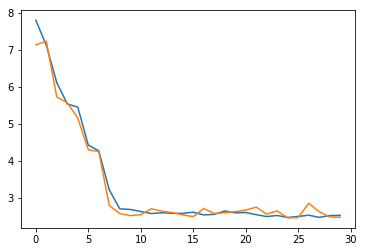

In [0]:
plt.plot(history.epoch,history.history['loss'])
plt.plot(history.epoch,history.history['val_loss'])

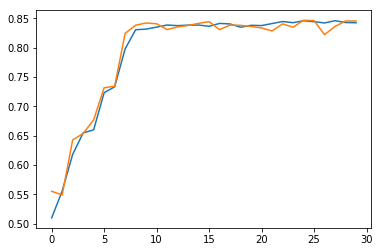

In [0]:
plt.plot(history.epoch,history.history['acc'])
plt.plot(history.epoch,history.history['val_acc'])